In [108]:
import numpy as np
import matplotlib.pyplot as plt

#for building linear regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

#check model J_cv
from sklearn.metrics import mean_squared_error

#data
from sklearn.datasets import make_regression
#for building and training neural network

import tensorflow as tf

#reduce display precision on numpy arrays
np.set_printoptions(precision=2)

#suppress warning
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)

REGRESSION DATA
-

In [109]:
#Load the data
#data=np.loadtxt('./data.csv', delimiter=',')
std=1
x,y=make_regression(n_samples=100,n_features=2,noise=0.1,random_state=30)

print(f"Mean and Std: {np.mean(x)},{np.std(x)}")

Mean and Std: -0.009710487889229402,1.0352255844285752


In [1]:
print(f"the shape of the inputs x is: {x.shape}")
print(f"the shape of the targets y is: {y.shape}")

# y = np.expand_dims(y, axis=1)

print(y[0:10])
print(x[0:10,:])

NameError: name 'x' is not defined

In [111]:
# get 60% of dataset as training set
x_train,x_,y_train,y_=train_test_split(x,y,test_size=0.40,random_state=1)

#furthur split the x_ to two sets
x_cv,x_test,y_cv,y_test=train_test_split(x_,y_,test_size=0.5,random_state=1)

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (60, 2)
the shape of the training set (target) is: (60,)

the shape of the cross validation set (input) is: (20, 2)
the shape of the cross validation set (target) is: (20,)

the shape of the test set (input) is: (20, 2)
the shape of the test set (target) is: (20,)


Scaling the Data
-

In [112]:
scaler_linear=StandardScaler()
X_train_scaled=scaler_linear.fit_transform(x_train)

print(f"Mean of the training set: {scaler_linear.mean_.squeeze()}")
print(f"Standard Deviation: {scaler_linear.scale_.squeeze()}")

Mean of the training set: [-0.07 -0.  ]
Standard Deviation: [0.99 0.97]


Fit the model using LinearRegression
-

In [113]:
linear_model=LinearRegression()

linear_model.fit(X_train_scaled,y_train)

LinearRegression()

Evaluate the model using Mean Error Squared
-

In [114]:
yhat = linear_model.predict(X_train_scaled)

print(f"J_train : {mean_squared_error(y_train,yhat)/2}")

#or Loop implementation
total_squared_error=0

for i in range(len(yhat)):
    squared_error_i = (yhat[i]-y_train[i])**2
    total_squared_error += squared_error_i

mse=total_squared_error/(2*len(yhat))

print(f"J_train (loop):", mse.squeeze())


J_train : 0.0033623134360000026
J_train (loop): 0.003362313436000003


What have we done so far...
-
- generated data from sklearn.datasets using make_regression
- divided that data into x_train,x_cv, x_test
- scaled the x_train to x_scaled using StandardScaler (mean and standard Deviation)
- Used linearRegression from sklearn.linear_model to fit w,b 

Note that
- scaler_linear have the information about the mean and the standard
- linear_model have the information about w and b parameters.

Next
- we will scale the x_cv using scaler_linear (Mean, std of X_train)
- find the J_cv using linear_model (W,b for X_train)

This is important to use scaling of x_train because:
- Say training set X_train[i]=500, which scales to 0.5, now gives yhat=300 given w,b
- Using new scaling feature, X_cv[j]=500, would scale to 0.67, give yhat=439 given w,b

In [115]:
X_cv_scaled=scaler_linear.transform(x_cv)

print(f"Mean used to scale the CV set: {scaler_linear.mean_.squeeze()}")
print(f"Standard deviation used to scale the CV set: {scaler_linear.scale_.squeeze()}")

Mean used to scale the CV set: [-0.07 -0.  ]
Standard deviation used to scale the CV set: [0.99 0.97]


In [116]:
yhat=linear_model.predict(X_cv_scaled)
print(f"Cross validation J_cv: {mean_squared_error(y_cv,yhat)/2}")

Cross validation J_cv: 0.0055143048301135285


Adding the polynomial feature
--
- using the PolynomialFeatures from sklearn.preprocessing we can add more features
- New input feature of square of x
- poly function wx+b to wx^2+wx+b (x_train to x_train_mapped)
- scaler_poly scales x (x_trained_mapped to x_trained_mapped_scaled)
- linearRegression fit w,w,b

In [117]:
poly =PolynomialFeatures(degree=2, include_bias=False)   #include_bias is weird

X_train_mapped=poly.fit_transform(x_train)
print(X_train_mapped[:5])

[[-1.41e+00  2.18e+00  1.98e+00 -3.08e+00  4.77e+00]
 [-5.95e-01  9.91e-01  3.54e-01 -5.89e-01  9.81e-01]
 [ 3.04e-01 -1.01e-01  9.23e-02 -3.06e-02  1.01e-02]
 [ 1.39e+00 -2.92e-02  1.94e+00 -4.07e-02  8.52e-04]
 [ 3.68e-01 -6.23e-01  1.36e-01 -2.30e-01  3.88e-01]]


In [118]:
scaler_poly=StandardScaler()

X_train_mapped_scaled=scaler_poly.fit_transform(X_train_mapped)
print(X_train_mapped_scaled[:5])

[[-1.35  2.25  0.79 -3.16  3.23]
 [-0.53  1.02 -0.5  -0.51  0.03]
 [ 0.38 -0.1  -0.71  0.09 -0.79]
 [ 1.48 -0.03  0.76  0.08 -0.8 ]
 [ 0.45 -0.64 -0.67 -0.13 -0.47]]


In [119]:
model=LinearRegression()
model.fit(X_train_mapped_scaled, y_train)

yhat=model.predict(X_train_mapped_scaled)
print(f"J_train: {mean_squared_error(y_train,yhat)/2}")

J_train: 0.003120857262946378


In [120]:
X_cv_mapped=poly.transform(x_cv)
X_cv_mapped_scaled=scaler_poly.transform(X_cv_mapped)
yhat=model.predict(X_cv_mapped_scaled)
print(f"J_cv: {mean_squared_error(y_cv,yhat)/2}")

J_cv: 0.004469214706066492


To deal with multiple models
-
- we form a loop

[0.0033623134360000026, 0.003120857262946378, 0.002846218026649064, 0.002615682498602813, 0.002006176914051502, 0.0017791152605461042, 0.001485543877885497, 0.001206876050006078, 0.0005650483382284687, 5.6305232217628546e-24]
[0.0055143048301135285, 0.004469214706066492, 0.006943913345968439, 0.01185020931512169, 0.22831836390529378, 0.8831196052824939, 23.177173302664556, 6327.15550110891, 1060237.9054831932, 4148070197.6326194]


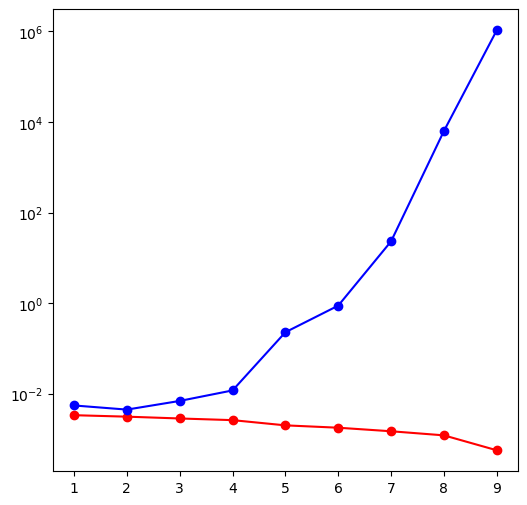

In [128]:
J_train=[]

J_cv=[]
models=[]
polys=[]
scalers = []

for degree in range(1,11):
    
    
    poly=PolynomialFeatures(degree, include_bias=False)
    X_trained_mapped=poly.fit_transform(x_train)
    polys.append(poly)

    scaler_poly = StandardScaler()
    X_trained_mapped_scaled=scaler_poly.fit_transform(X_trained_mapped)
    scalers.append(scaler_poly)

    model=LinearRegression()
    model.fit(X_trained_mapped_scaled,y_train)
    models.append(model)

    yhat=model.predict(X_trained_mapped_scaled)
    train_mse=mean_squared_error(y_train,yhat)/2
    J_train.append(train_mse)

    X_cv_mapped=poly.transform(x_cv)
    X_cv_mapped_scaled=scaler_poly.transform(X_cv_mapped)
    yhat=model.predict(X_cv_mapped_scaled)

    cv_mse=mean_squared_error(y_cv,yhat)/2
    J_cv.append(cv_mse)
print(J_train)
print(J_cv)

fig, ax=plt.subplots(figsize=(6,6))
ax.plot(range(1,10),J_train[:9], marker='o',color='red')
ax.plot(range(1,10), J_cv[:9], marker='o', color='blue')
plt.yscale("log")

In [130]:
degree = np.argmin(J_cv)+1
print(f"lowest J_cv degree:{degree}")

lowest J_cv degree:2


In [132]:
X_test_mapped= polys[degree-1].transform(x_test)
X_test_mapped_scaled=scalers[degree-1].transform(X_test_mapped)

yhat=models[degree-1].predict(X_test_mapped_scaled)
J_test=mean_squared_error(y_test,yhat)/2

print(f"J_train: {J_train[degree-1]}")
print(f"J_cv: {J_cv[degree-1]}")
print(f"J_test: {J_test}")


J_train: 0.003120857262946378
J_cv: 0.004469214706066492
J_test: 0.0056270124419869555


Well done
-